In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train["train_test"]=1
test["train_test"]=0
test["Survived"]=np.NaN
df=pd.concat([train,test])
data=pd.concat([train,test])

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
data.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
train_test       int64
dtype: object

In [4]:
#Creating categories based on Cabin letters
train["cabin_adv"]=train.Cabin.apply(lambda x:str(x)[0])
print(train.cabin_adv.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


In [5]:
#feature engineering based on person's title

train['name_title']=train.Name.apply(lambda x: x.split(',')[1].split(".")[0].strip())
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
the Countess      1
Jonkheer          1
Lady              1
Ms                1
Mme               1
Don               1
Capt              1
Sir               1
Name: name_title, dtype: int64

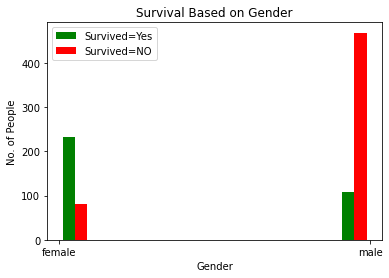

In [6]:
#Visulaization
#Survival rate based on Age
G_Sur=train[train.Survived==1].Sex
G_no=train[train.Survived==0].Sex
plt.xlabel('Gender')
plt.ylabel('No. of People')
plt.title("Survival Based on Gender")

plt.hist([G_Sur,G_no],color=["green","red"])
plt.legend(["Survived=Yes","Survived=NO"])

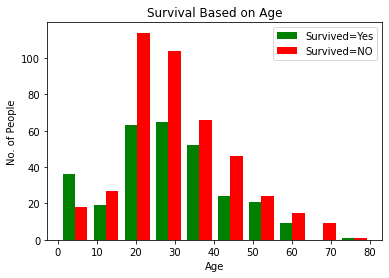

In [7]:
#Survival based on Age
a_sur=train[train.Survived==1].Age
a_no=train[train.Survived==0].Age
plt.xlabel('Age')
plt.ylabel('No. of People')
plt.title("Survival Based on Age")

plt.hist([a_sur,a_no],color=["green","red"])
plt.legend(["Survived=Yes","Survived=NO"])

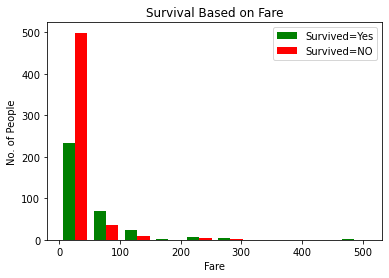

In [8]:
#Survival based on fare rate
f_sur=train[train.Survived==1].Fare
f_no=train[train.Survived==0].Fare
plt.xlabel('Fare')
plt.ylabel('No. of People')
plt.title("Survival Based on Fare")

plt.hist([f_sur,f_no],color=["green","red"])
plt.legend(["Survived=Yes","Survived=NO"])

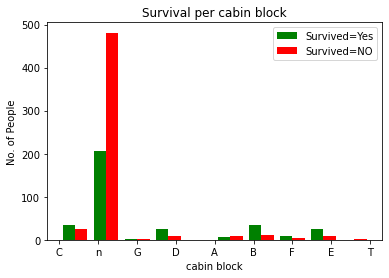

In [9]:
#Survival based on cabin block
c_sur=train[train.Survived==1].cabin_adv
c_no=train[train.Survived==0].cabin_adv
plt.xlabel('cabin block')
plt.ylabel('No. of People')
plt.title("Survival per cabin block")
plt.hist([c_sur,c_no],color=["green","red"])
plt.legend(["Survived=Yes","Survived=NO"])

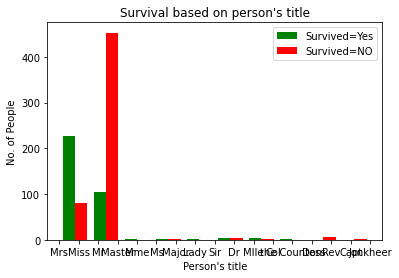

In [10]:
#Survival based on person's title
pt_sur=train[train.Survived==1].name_title
pt_no=train[train.Survived==0].name_title
plt.xlabel("Person's title")
plt.ylabel('No. of People')
plt.title("Survival based on person's title")
plt.hist([pt_sur,pt_no],color=["green","red"])
plt.legend(["Survived=Yes","Survived=NO"])


In [11]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'cabin_adv', 'name_title'],
      dtype='object')

In [12]:
#Data Processing
data["cabin_adv"]=data.Cabin.apply(lambda x:str(x)[0])
data['name_title']=data.Name.apply(lambda x: x.split(',')[1].split(".")[0].strip())



In [13]:
#imputing null values for continuous data with mean value 
data.Age=data.Age.fillna(train.Age.mean())
data.Fare=data.Fare.fillna(train.Fare.mean())
#Dropping null embarked rows(only 2 rows)
data.dropna(subset=['Embarked'],inplace=True)
data.Age.unique

<bound method Series.unique of 0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
413    29.699118
414    39.000000
415    38.500000
416    29.699118
417    29.699118
Name: Age, Length: 1307, dtype: float64>

In [14]:
#Droping inappropriate columns
data.drop(['PassengerId',"Name","Cabin","Ticket"],axis='columns',inplace=True)


In [15]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'train_test', 'cabin_adv', 'name_title'],
      dtype='object')

In [16]:
#to check unique values in each column
for column in data:
    print(f"{column}:{data[column].unique()}")

Survived:[ 0.  1. nan]
Pclass:[3 1 2]
Sex:['male' 'female']
Age:[22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5      

In [17]:
#Replacing Male and Female to 0 and 1
data["Sex"].replace({"female":1,"male":0},inplace=True)
#Changing Pclass from numeric to Categorical
data['Pclass'].replace({1:"Class-1",2:"Class-2",3:"Class-3"},inplace=True)

In [18]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,cabin_adv,name_title
172,NaN,Class-3,0,23.0,1,0,13.9000,S,0,n,Mr
389,1.0,Class-2,1,17.0,0,0,12.0000,C,1,n,Miss
281,0.0,Class-3,0,28.0,0,0,7.8542,S,1,n,Mr
257,NaN,Class-3,0,28.0,0,0,8.0500,S,0,n,Mr
275,NaN,Class-2,1,20.0,1,0,26.0000,S,0,n,Miss


In [19]:
#OneHotEncoding for categorical data
scaled_data=pd.get_dummies(data=data,columns=["Embarked","cabin_adv","name_title","Pclass"])



In [20]:
for column in scaled_data:
    print(f"{column}:{scaled_data[column].unique()}")

Survived:[ 0.  1. nan]
Sex:[0 1]
Age:[22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5         0.42       34.5        7

In [21]:
#Scaling :
cols_to_scale=["Age","SibSp","Parch","Fare"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data[cols_to_scale]=scaler.fit_transform(scaled_data[cols_to_scale])

In [22]:
for column in scaled_data:
    print(f"{column}:{scaled_data[column].unique()}")

Survived:[ 0.  1. nan]
Sex:[0 1]
Age:[0.27345609 0.473882   0.32356257 0.43630214 0.36990001 0.6743079
 0.02292371 0.33608919 0.17324314 0.04797695 0.72441438 0.24840286
 0.48640862 0.68683452 0.38619567 0.42377552 0.18576976 0.34861581
 0.09808343 0.23587624 0.49893524 0.82462733 0.52398848 0.26092948
 0.22334962 0.03545033 0.08555681 0.61167481 0.36114243 0.81210071
 0.35487912 0.06050357 0.13566328 0.56156833 0.210823   0.39872228
 0.19829638 0.31103595 0.00826757 0.37366905 0.4112489  0.28598271
 0.29850933 0.57409495 0.736941   0.88726043 0.46135538 0.58662157
 0.17950645 0.88099712 0.40498559 0.1481899  0.11061005 0.45509207
 0.63672805 0.69309783 0.50519855 0.54904171 0.01039709 0.76199424
 0.69936114 0.62420143 0.44882876 0.56783164 0.25466617 0.77452086
 0.51146186 0.64925467 0.78704748 0.29224602 0.00939496 0.53651509
 0.74946762 0.12313667 0.79957409 0.16071652 0.59914819 0.00726544
 0.66178129 0.71188776 1.         0.87473381 0.30477264 0.07303019
 0.00626331 0.37993236 0.0

In [23]:
scaled_data.shape

(1307, 40)

In [24]:
#Splitting train and testing and prediction dataset
Y_data=scaled_data[scaled_data.train_test==1].Survived
X_data=scaled_data[scaled_data.train_test==1].drop(['train_test',"Survived"],axis=1)

pred=scaled_data[scaled_data.train_test==0].drop(['train_test','Survived'],axis=1)



In [49]:
#Building Model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(40,input_shape=(38,),activation='relu'),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.fit(X_data,Y_data,epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 5ms/step - loss: 0.6385 - accuracy: 0.7615
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 0.5434 - accuracy: 0.7987
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.4690 - accuracy: 0.8065
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 0.4399 - accuracy: 0.8155
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 0.4239 - accuracy: 0.8189
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 0.4146 - accuracy: 0.8234
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 0.4064 - accuracy: 0.8313
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 0.4036 - accuracy: 0.8301
Epoch 9/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3996 - accuracy: 0.8324
Epoch 10/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3934 - accuracy: 0.8369
Epoch 11/

28/28 [==============================] - 0s 5ms/step - loss: 0.3301 - accuracy: 0.8650
Epoch 84/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3286 - accuracy: 0.8639
Epoch 85/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3283 - accuracy: 0.8661
Epoch 86/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.8628
Epoch 87/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3312 - accuracy: 0.8684
Epoch 88/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3281 - accuracy: 0.8628
Epoch 89/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3264 - accuracy: 0.8673
Epoch 90/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3276 - accuracy: 0.8628
Epoch 91/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3247 - accuracy: 0.8718
Epoch 92/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.8684
Epoch 93/100


In [43]:
pred.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,...,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess,Pclass_Class-1,Pclass_Class-2,Pclass_Class-3
0,0,0.430039,0.000,0.000000,0.015282,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0.586622,0.125,0.000000,0.013663,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0.774521,0.000,0.000000,0.018909,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0.336089,0.000,0.000000,0.016908,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0.273456,0.125,0.111111,0.023984,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [44]:
y_p=model.predict(pred)
y_p[:5]

array([[0.06814118],
       [0.401788  ],
       [0.03352904],
       [0.11217226],
       [0.53081024]], dtype=float32)

In [45]:
y_pred=[]
for i in y_p:
    if i >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:5]

[0, 0, 0, 0, 1]

In [46]:
output=pd.DataFrame({"PassengerId":test.PassengerId,"Survived":y_pred})
output.sample(5)

,PassengerId,Survived
131,1023,0
105,997,0
307,1199,1
58,950,0
408,1300,1


In [47]:
output.shape

(418, 2)

In [48]:
output.to_csv('my_submission2.csv', index=False)